# 0. 라이브러리 세팅

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 맷플롯립 한글 설정 
# matplotlib Korean font
plt.rc('font', family='Malgun Gothic')
# 모든 컬럼을 표시하도록 설정
pd.set_option('display.max_columns', None)

# 컬럼의 너비 제한 해제
pd.set_option('display.max_colwidth', None)

# 출력할 행의 수를 설정 (필요에 따라 조정)
pd.set_option('display.max_rows', 300)


# 1. 데이터 로드

In [6]:
# 데이터 로드
bld_land = gpd.read_file('00data/27.건축물대장+SHP.geojson')
total_bld = gpd.read_file('00data/지도_세종시_건물_주소_경계내.geojson')
zone_sanga = gpd.read_file('00data/14.대상구역_상가개폐업정보.geojson')


In [22]:
# 지도 데이터 불러오고 좌표 설정

# 행정구역 경계 데이터 경로
sejong_path = "00data/세종특별자치시/36000"

data_path_build = sejong_path + "/TL_SPBD_BULD.shp"
data_path_rw = sejong_path + "/TL_SPRD_RW.shp"

# Shapefile 데이터 불러오기
building = gpd.read_file(data_path_build, encoding='euc-kr')
rw_poly = gpd.read_file(data_path_rw, encoding='euc-kr')
sejong_zone_adm = gpd.read_file('00data/11.세종시_대상구역도.geojson')
# 100x100 격자 데이터
area_grid = gpd.read_file('00data/4.세종시_격자(매핑용).geojson')

# 좌표계 설정
building = building.set_crs('EPSG:5179')
rw_poly = rw_poly.set_crs('EPSG:5179')
building_4326 = building.to_crs(epsg=4326)
rw_poly_4326 = rw_poly.to_crs(epsg=4326)

In [23]:
# 대상구역계 바운더리 추출
sejong_zone_adm_boundary = sejong_zone_adm.boundary

# 대상구역계 안에 있는 정보만 클리핑 및 추출
# rw_poly_clipped = gpd.overlay(rw_poly_4326, sejong_zone_adm, how='intersection')
building_clipped = gpd.sjoin(building_4326, sejong_zone_adm, how='inner', predicate='within')

# 겹치는 부분만 남기고 필터링
area_grid_intsc = gpd.overlay(area_grid, sejong_zone_adm, how='intersection')

# 2. 건축물 대장 병합 파일 전처리

In [7]:
# 필요없는 것들 컬럼 제거
bld_land.drop(['RN_CD', 'SIG_CD', 'BULD_SE_CD', 'BULD_MNNM', 'BULD_SLNO', 'BUL_MAN_NO',
 'EQB_MAN_SN', 'EFFECT_DE', 'emd_cd_x', 'sgg_cd', 'plat_gb_cd', 'new_plat_plc',
 'bld_nm_y', 'na_bjdong_cd'], axis =1, inplace = True)
bld_land.drop('geometry', axis =1).head()

,ADR_MNG_NO,emd_nm,rd_addr,bld_nm_x,plat_plc,emd_cd_y,regstr_gb_cd_nm,na_road_cd,dong_nm,plat_area,arch_area,bc_rat,tot_area,vl_rat_estm_tot_area,vl_rat,main_purps_cd_nm_x,etc_purps_x,hhld_cnt,heit,grnd_flr_cnt,ugrnd_flr_cnt,ride_use_elvt_cnt,emgen_use_elvt_cnt,atch_bld_area,tot_dong_tot_area,indr_mech_utcnt,indr_mech_area,oudr_mech_utcnt,oudr_mech_area,indr_auto_utcnt,indr_auto_area,oudr_auto_utcnt,oudr_auto_area,use_apr_day,ho_cnt,PNU,flr_num,flr_num_nm,main_purps_cd_nm_y,etc_purps_y,area_sqm,sub_atch_gb_cd_nm,area_excl_yn
0,36110101234810500058000000,반곡동,세종특별자치시 시청대로 580,수루배마을6단지 근린생활시설,세종특별자치시 반곡동 1035번지,10100,집합,3.611023e+11,근린생활시설-1,0.0,400.12,0.00,114.68,114.68,0.00,제2종근린생활시설,근린생활시설-1,0,4.5,1,0,0,0,0.0,114.68,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,2,3611010100110350000,1,1층,기타제2종근린생활시설,근린생활시설-1,114.68,주건축물,0.0
1,36110101234810500058000000,반곡동,세종특별자치시 시청대로 580,수루배마을6단지 근린생활시설,세종특별자치시 반곡동 1035번지,10100,집합,3.611023e+11,근린생활시설-2,0.0,218.29,0.00,231.24,231.24,0.00,제2종근린생활시설,근린생활시설-2,0,4.5,1,0,0,0,0.0,231.24,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,5,3611010100110350000,1,1층,기타제2종근린생활시설,근린생활시설-2,231.24,주건축물,0.0
2,36110101200000200195200000,반곡동,세종특별자치시 한누리대로 1952,반곡타워,세종특별자치시 반곡동 839번지,10100,집합,3.611020e+11,주건축물제1동,1633.0,1137.40,69.65,10875.90,6437.73,394.23,제2종근린생활시설,제2종근린생활시설,0,25.9,6,3,2,0,0.0,10875.90,0,0.0,0,0.0,84,3676.8,0,0.0,20180830.0,0,3611010100108390000,1,1층,소매점,소매점(주차로),0.00,주건축물,0.0
3,36110101200000200195200000,반곡동,세종특별자치시 한누리대로 1952,반곡타워,세종특별자치시 반곡동 839번지,10100,집합,3.611020e+11,주건축물제1동,1633.0,1137.40,69.65,10875.90,6437.73,394.23,제2종근린생활시설,제2종근린생활시설,0,25.9,6,3,2,0,0.0,10875.90,0,0.0,0,0.0,84,3676.8,0,0.0,20180830.0,0,3611010100108390000,1,지1층,사무소,주차장,0.00,주건축물,0.0
4,36110101200000200195200000,반곡동,세종특별자치시 한누리대로 1952,반곡타워,세종특별자치시 반곡동 839번지,10100,집합,3.611020e+11,주건축물제1동,1633.0,1137.40,69.65,10875.90,6437.73,394.23,제2종근린생활시설,제2종근린생활시설,0,25.9,6,3,2,0,0.0,10875.90,0,0.0,0,0.0,84,3676.8,0,0.0,20180830.0,0,3611010100108390000,2,지2층,사무소,주차장,0.00,주건축물,0.0


In [8]:
bld_land.shape

(4201, 44)

In [9]:
# plat_area의 데이터를 1e6 이런 형식이 되는데, 이를 int로 변환

bld_land.plat_area = bld_land.plat_area.astype(int)

count    4201.000000
mean      304.093779
std       196.900501
min         0.000000
25%        79.830000
50%       388.290000
75%       491.040000
max       551.614200
Name: vl_rat, dtype: float64
(604, 44) / (4201, 44)


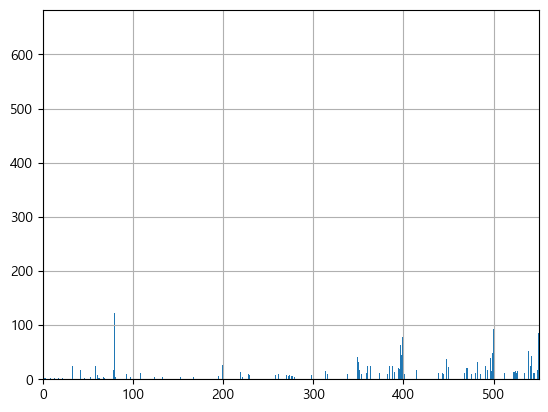

In [10]:
# vl_rat 값이 어떻게 분포되어있는지 확인하고 싶어: 히스토그램으로 
print(bld_land['vl_rat'].describe())
bld_land['vl_rat'].hist(bins=1000)
# x 범위를 조정
plt.xlim(0, 550)

# 0인 값의 개수 확인
print(bld_land[bld_land['vl_rat'] == 0].shape, '/', bld_land.shape)
plt.show()

In [11]:
# 건물 이름 기준 삭제 리스트

print(bld_land.shape)
bld_land = bld_land[~bld_land['bld_nm_x'].isin(['보람동 119안전센터', '첫마을안전센터', '세종한솔동우체국', '설비동',
         '농림축산식품부, 해양수산부', '다정동 복합커뮤니티센터', 
            '고운동복합커뮤니티센터',  '반곡동 복합커뮤니티센터',
            '119안전센터', '도담동주민센터', '새롬동복합커뮤니티센터', '세종 세무서', '세종남부경찰서',
            '축산물품질평가원', '세종특별자치시청', '세종특별자치시교육청'])]

print(bld_land.shape)

(4201, 44)
(4048, 44)


In [12]:
bld_land[bld_land.rd_addr.fillna('').str.contains('대평로 75')].drop('geometry', axis=1)

,ADR_MNG_NO,emd_nm,rd_addr,bld_nm_x,plat_plc,emd_cd_y,regstr_gb_cd_nm,na_road_cd,dong_nm,plat_area,arch_area,bc_rat,tot_area,vl_rat_estm_tot_area,vl_rat,main_purps_cd_nm_x,etc_purps_x,hhld_cnt,heit,grnd_flr_cnt,ugrnd_flr_cnt,ride_use_elvt_cnt,emgen_use_elvt_cnt,atch_bld_area,tot_dong_tot_area,indr_mech_utcnt,indr_mech_area,oudr_mech_utcnt,oudr_mech_area,indr_auto_utcnt,indr_auto_area,oudr_auto_utcnt,oudr_auto_area,use_apr_day,ho_cnt,PNU,flr_num,flr_num_nm,main_purps_cd_nm_y,etc_purps_y,area_sqm,sub_atch_gb_cd_nm,area_excl_yn
1038,36110104335079500007500000,대평동,세종특별자치시 대평로 75,해비치빌딩,세종특별자치시 대평동 677번지,10400,집합,3.611034e+11,NaN,2118,1435.0152,67.740521,13130.1552,8477.2577,400.17266,제1종근린생활시설,"제1종,제2종근린생활시설",0,35.86,9,3,2,0,0.0,13130.1552,0,0.0,0,0.0,96,4119.795,0,206.2375,20180604.0,83,3611010400106770000,4,4층,의원,제1종근린생활시설(의원),1075.7450,주건축물,0.0
1039,36110104335079500007500000,대평동,세종특별자치시 대평로 75,해비치빌딩,세종특별자치시 대평동 677번지,10400,집합,3.611034e+11,NaN,2118,1435.0152,67.740521,13130.1552,8477.2577,400.17266,제1종근린생활시설,"제1종,제2종근린생활시설",0,35.86,9,3,2,0,0.0,13130.1552,0,0.0,0,0.0,96,4119.795,0,206.2375,20180604.0,83,3611010400106770000,9,9층,기타제1종근린생활시설,E.V홀,14.4700,주건축물,0.0
1040,36110104335079500007500000,대평동,세종특별자치시 대평로 75,해비치빌딩,세종특별자치시 대평동 677번지,10400,집합,3.611034e+11,NaN,2118,1435.0152,67.740521,13130.1552,8477.2577,400.17266,제1종근린생활시설,"제1종,제2종근린생활시설",0,35.86,9,3,2,0,0.0,13130.1552,0,0.0,0,0.0,96,4119.795,0,206.2375,20180604.0,83,3611010400106770000,1,1층,기타제1종근린생활시설,주차장,0.0000,주건축물,0.0
1041,36110104335079500007500000,대평동,세종특별자치시 대평로 75,해비치빌딩,세종특별자치시 대평동 677번지,10400,집합,3.611034e+11,NaN,2118,1435.0152,67.740521,13130.1552,8477.2577,400.17266,제1종근린생활시설,"제1종,제2종근린생활시설",0,35.86,9,3,2,0,0.0,13130.1552,0,0.0,0,0.0,96,4119.795,0,206.2375,20180604.0,83,3611010400106770000,1,지1층,기타제1종근린생활시설,주차장,0.0000,주건축물,0.0
1042,36110104335079500007500000,대평동,세종특별자치시 대평로 75,해비치빌딩,세종특별자치시 대평동 677번지,10400,집합,3.611034e+11,NaN,2118,1435.0152,67.740521,13130.1552,8477.2577,400.17266,제1종근린생활시설,"제1종,제2종근린생활시설",0,35.86,9,3,2,0,0.0,13130.1552,0,0.0,0,0.0,96,4119.795,0,206.2375,20180604.0,83,3611010400106770000,8,8층,의원,제1종근린생활시설(의원),425.4754,주건축물,0.0
1043,36110104335079500007500000,대평동,세종특별자치시 대평로 75,해비치빌딩,세종특별자치시 대평동 677번지,10400,집합,3.611034e+11,NaN,2118,1435.0152,67.740521,13130.1552,8477.2577,400.17266,제1종근린생활시설,"제1종,제2종근린생활시설",0,35.86,9,3,2,0,0.0,13130.1552,0,0.0,0,0.0,96,4119.795,0,206.2375,20180604.0,83,3611010400106770000,1,지1층,기타제1종근린생활시설,방재실,25.5400,주건축물,0.0
1044,36110104335079500007500000,대평동,세종특별자치시 대평로 75,해비치빌딩,세종특별자치시 대평동 677번지,10400,집합,3.611034e+11,NaN,2118,1435.0152,67.740521,13130.1552,8477.2577,400.17266,제1종근린생활시설,"제1종,제2종근린생활시설",0,35.86,9,3,2,0,0.0,13130.1552,0,0.0,0,0.0,96,4119.795,0,206.2375,20180604.0,83,3611010400106770000,8,8층,일반음식점,제2종근린생활시설(일반음식점),351.3871,주건축물,0.0
1045,36110104335079500007500000,대평동,세종특별자치시 대평로 75,해비치빌딩,세종특별자치시 대평동 677번지,10400,집합,3.611034e+11,NaN,2118,1435.0152,67.740521,13130.1552,8477.2577,400.17266,제1종근린생활시설,"제1종,제2종근린생활시설",0,35.86,9,3,2,0,0.0,13130.1552,0,0.0,0,0.0,96,4119.795,0,206.2375,20180604.0,83,3611010400106770000,2,지2층,기타제1종근린생활시설,주차장,0.0000,주건축물,0.0
1046,36110104335079500007500000,대평동,세종특별자치시 대평로 75,해비치빌딩,세종특별자치시 대평동 677번지,10400,집합,3.611034e+11,NaN,2118,1435.0152,67.740521,13130.1552,8477.2577,400.17266,제1종근린생활시설,"제1종,제2종근린생활시설",0,35.86,9,3,2,0,0.0,13130.1552,0,0.0,0,0.0,96,4119.795,0,206.2375,20180604.0,83,3611010400106770000,3,3층,일반음식점,제2종근린생활시설(일반음식점),1075.7450,주건축물,0.0
1047,36110104335079500007500000,대평동,세종특별자치시 대평로 75,해비치빌딩,세종특별자치시 대평동 677번지,10400,집합,3.611034e+11,NaN,2118,1435.0152,67.740521,13130.1552,8477.2577,400.17266,제1종근린생활시설,"제1종,제2종근린생활시설",0,35.86,9,3,2,0,0.0,13130.1552,0,0.0,0,0.0,96,4119.795,0,206.2375,20180604.0,83,3611010400106770000,7,7층,학원,교육연구시설(학원),1000.5050,주건축물,0.0


# 3. 건축물 대장 쉐이프 파일 함수화

In [13]:
# 2012.07-2024.05 날짜 컬럼 생성 
date_range = pd.date_range(start='2012-07', end='2024-06', freq='M').strftime('%Y-%m')

In [14]:
def process_building_data(df):
    # 1. 건축물 주용도, 사용 승인일, 건축면적, 건폐율
    buld_nm = df['bld_nm_x'].iloc[0]
    buld_type = ', '.join(df['main_purps_cd_nm_x'].unique())
    use_apr_day = pd.to_datetime(df['use_apr_day'].iloc[0], format='%Y%m%d')
    arch_area = df['arch_area'].unique().sum()
    bc_rat = df['bc_rat'].unique().sum()
    tot_area = df['tot_area'].unique().sum()  # 필지 단위 계약면적 산정
    tot_sanga_area = df['area_sqm'].sum()  # 총 상가 면적 산정
    height = df['heit'].iloc[0]
    floor = max(df['flr_num'].unique())# 최고 층수

    # 2012.07-2024.05 날짜 컬럼 생성 
    date_range = pd.date_range(start='2012-07', end='2024-06', freq='M').strftime('%Y-%m')
    long_form = pd.DataFrame(date_range, columns=['date'])
    long_form['date'] = pd.to_datetime(long_form['date'])

    def static_bld_info(row):
        if row['date'] >= use_apr_day:
            row['buld_nm'] = buld_nm
            row['buld_type'] = buld_type
            row['use_apr_day'] = use_apr_day
            row['arch_area'] = arch_area
            row['bc_rat'] = bc_rat
            row['tot_sanga_area'] = tot_sanga_area
            row['tot_area'] = tot_area
            row['height'] = height
        return row

    long_form = long_form.apply(static_bld_info, axis=1)
    # 지오매트리 추가
    long_form['geometry'] = df['geometry'].values[0]
    return long_form


## 3.1 건축물대장 그룹별 함수 적용

In [15]:
# 그룹 별로 함수를 적용후 groupby
grouped_bld = bld_land.groupby('rd_addr').apply(process_building_data)

In [16]:
grouped_bld.reset_index(inplace=True)
grouped_bld.drop('level_1', axis=1, inplace=True)
grouped_bld.head(2).drop('geometry', axis=1)

,rd_addr,arch_area,bc_rat,buld_nm,buld_type,date,height,tot_area,tot_sanga_area,use_apr_day
0,세종특별자치시 가름로 143,NaT,NaT,NaT,NaT,2012-07-01,NaT,NaT,NaT,NaT
1,세종특별자치시 가름로 143,NaT,NaT,NaT,NaT,2012-08-01,NaT,NaT,NaT,NaT


In [17]:
# 수동 조정
# 1. 카림애비뉴 1 추가
karim_1 = 27906.864
grouped_bld.loc[(grouped_bld.rd_addr == '세종특별자치시 보듬4로 9'), 'tot_area'] += karim_1

# 4. 상가개폐업데이터 병합

## 4.1. 상가 데이터 불러오기

In [18]:
# index right 드랍
zone_sanga.drop('index_right', axis=1, inplace=True)
# total_bld.drop('index_right', axis=1, inplace=True)

In [19]:
# 건축물 shp에 상가 포인트를 조인
print(zone_sanga.shape)
sanga_land = gpd.sjoin(total_bld, zone_sanga, how='inner', predicate='contains', lsuffix='left', rsuffix='right')
sanga_land.drop('index_right', axis=1, inplace=True)
print(sanga_land.shape)
# sanga_land.head(1)

(22912, 24)
(21106, 37)


In [20]:
# 면적 null 값 채우기
# 함수 정의: 그룹 내에서 중위값을 구하거나, 모든 값이 0이면 전체 평균값 사용
def fill_with_median_or_mean(group, median_area):
    median = group.median()
    if group.isna().all(): # 만약에 그룹 내의 모든 값이 Null이면 전체 평균값 사용
        return group.fillna(median_area)
    return group.fillna(median)

# 2. 면적 전처리
# Null 값에 중위값을 적용: 이상치에 민감하지 않음
median_area = sanga_land['plc_area'].median()

# 함수 적용
sanga_land['plc_area'] = sanga_land.groupby('rd_addr_left')['plc_area'].transform(lambda x: fill_with_median_or_mean(x, median_area))
print('면적 결측치 개수 확인: ',sanga_land['plc_area'].isna().sum())
sanga_land.head(3).drop(['geometry'], axis=1)

면적 결측치 개수 확인:  0


,ADR_MNG_NO,SIG_CD,RN_CD,BULD_SE_CD,BULD_MNNM,BULD_SLNO,BUL_MAN_NO,EQB_MAN_SN,EFFECT_DE,emd_cd,emd_nm,rd_addr_left,bld_nm,service_nm,lcpmt_dt,rtrcn_dt,biz_stts_cd,biz_stts_nm,dtls_stts_cd,dtls_stts_nm,cls_date,tc_strt_dt,tc_end_dt,re_op_dt,plc_area,zip_cd,addr,rd_addr_right,rd_zip_cd,bplc_nm,biz_type,lon,lat,EMD_CD,COL_ADM_SE,EMD_NM
4,36110110325807700000900000,36110,3258077,0,9,0,0,26508,20220223,3611011000,어진동,세종특별자치시 다솜1로 9,한뜰마을4단지,미용업,2017-07-05,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,28.24,339-012,세종특별자치시 어진동 520,세종특별자치시 다솜1로 21 한뜰마을 4단지 근린생활시설 1동 2층 218호 (어진동),NaN,꾸밈,일반미용업,127.255563,36.500112,36110110,36110,어진동
4,36110110325807700000900000,36110,3258077,0,9,0,0,26508,20220223,3611011000,어진동,세종특별자치시 다솜1로 9,한뜰마을4단지,일반음식점,2023-03-16,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,104.89,339-012,세종특별자치시 어진동 520,세종특별자치시 다솜1로 21 한뜰마을4단지(근린생활시설301) 2층 249 250호 (어진동),NaN,토라,일식,127.255563,36.500112,36110110,36110,어진동
4,36110110325807700000900000,36110,3258077,0,9,0,0,26508,20220223,3611011000,어진동,세종특별자치시 다솜1로 9,한뜰마을4단지,건강기능식품일반판매업,2022-05-19,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,37.16,339-012,세종특별자치시 어진동 ***,세종특별자치시 다솜*로 ** 한뜰마을*단지 상가*동 *층 ***호 (어진동),NaN,초월홍삼 세종청사점,NaN,127.255563,36.500112,36110110,36110,어진동


NameError: name 'building_clipped' is not defined

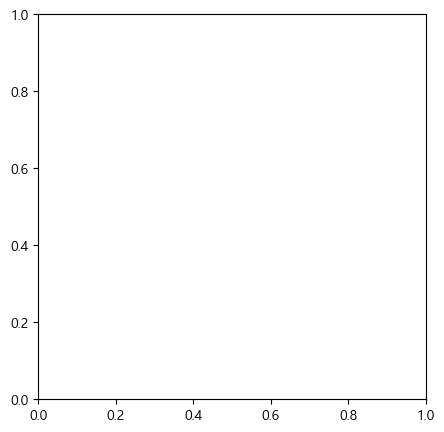

In [21]:
# 시각화 - zone_sanga가 건물 안에 있는지 확인
# 시각화
fig, ax = plt.subplots(figsize=(5, 5))

# 도로 데이터
# rw_poly_clipped.plot(ax=ax, facecolor='lightgrey', zorder=1)
# 건물 데이터
building_clipped.plot(ax=ax, facecolor='darkgrey', zorder=2)
# 세종시 경계(기존 읍면동 단위)
sejong_zone_adm_boundary.plot(ax=ax, facecolor='none', edgecolor='DarkRed', linewidth=0.2, zorder=3)
# 격자 데이터
area_grid_intsc.plot(ax=ax, facecolor='none', edgecolor='darkred', linewidth=0.1, linestyle='--', alpha=0.5)

# 상가 데이터
sanga_land.plot(ax=ax, color='darkred', zorder=5)

plt.show()

## 4.2. 주거단지 전처리

In [22]:
# 주거단지 중 상가동이 있는 경우와 없는 경우 전처리
# 만약에 리스트에 있는 애들 : 상가단지 구분이 없는 경우
kind_sanga = [
    '세종특별자치시 보듬4로 19', '세종특별자치시 마음로 181', '세종특별자치시 다정남로 22', '세종특별자치시 다솜로 290',
    '세종특별자치시 달빛1로 201', '세종특별자치시 만남로 187', '세종특별자치시 새롬남로 98', '세종특별자치시 보듬4로 55',
    '세종특별자치시 대평1길 27', '세종특별자치시 달빛1로 74', '세종특별자치시 다정북로 180', '세종특별자치시 도움3로 160',
    '세종특별자치시 새롬중앙로 19', '세종특별자치시 달빛로 109', '세종특별자치시 바른1길 3', '세종특별자치시 새롬남로 102',
    '세종특별자치시 소담3로 21', '세종특별자치시 보듬8로 45', '세종특별자치시 달빛로 222', '세종특별자치시 다솜1로 211',
    '세종특별자치시 남세종로 301', '세종특별자치시 마음로 94', '세종특별자치시 마음안로 190', '세종특별자치시 도움3로 68',
    '세종특별자치시 시청대로 500', '세종특별자치시 누리1로 81', '세종특별자치시 새롬중앙로 89', '세종특별자치시 누리로 119',
    '세종특별자치시 마음로 243', '세종특별자치시 마음안로 167', '세종특별자치시 마음안로 157', '세종특별자치시 한누리대로 1839',
    '세종특별자치시 달빛1로 309', '세종특별자치시 마음안로 47', '세종특별자치시 다정로 3', '세종특별자치시 보듬3로 74',
    '세종특별자치시 새롬중앙1로 13', '세종특별자치시 보듬3로 73', '세종특별자치시 만남로8길 24-5', '세종특별자치시 도움1로 145',
    '세종특별자치시 마음안로 34', '세종특별자치시 마음로 151', '세종특별자치시 도움3로 105-10', '세종특별자치시 도움1로 105',
    '세종특별자치시 마음로 239', '세종특별자치시 다정북로 109', '세종특별자치시 남세종로 302', '세종특별자치시 도움3로 105-8',
    '세종특별자치시 법원2로 18', '세종특별자치시 남세종로 357', '세종특별자치시 나성북1로 23', '세종특별자치시 달빛로 165',
    '세종특별자치시 도움3로 75', '세종특별자치시 마음안로 101', '세종특별자치시 마음안로 13', '세종특별자치시 반곡2길 9',
    '종특별자치시 새롬로 32', '종특별자치시 중앙공원서로 10'
] 


# 필터링 함수 정의
def filter_row(row):
    if row['rd_addr_left'] in kind_sanga:
        return True
    elif pd.notna(row['bld_nm']) and '단지' in row['bld_nm'] and pd.notna(row['rd_addr_right']) and '상가' not in row['rd_addr_right']:
        # '단지' 중 '상가'라는 단어가 없는 경우 제외
        return False
    return True

# apply 메서드를 사용하여 각 행에 함수 적용
sanga_land = sanga_land[sanga_land.apply(filter_row, axis=1)]
sanga_land.shape

(16523, 37)

In [23]:
# 특정 상가 면적 과대 추정 중위 값으로 대체 
sanga_land.loc[sanga_land.bplc_nm == '슬로우캘리 세종소담점', 'plc_area'] = sanga_land['plc_area'].median()
sanga_land[sanga_land.bplc_nm =='슬로우캘리 세종소담점'].drop('geometry', axis=1)

,ADR_MNG_NO,SIG_CD,RN_CD,BULD_SE_CD,BULD_MNNM,BULD_SLNO,BUL_MAN_NO,EQB_MAN_SN,EFFECT_DE,emd_cd,emd_nm,rd_addr_left,bld_nm,service_nm,lcpmt_dt,rtrcn_dt,biz_stts_cd,biz_stts_nm,dtls_stts_cd,dtls_stts_nm,cls_date,tc_strt_dt,tc_end_dt,re_op_dt,plc_area,zip_cd,addr,rd_addr_right,rd_zip_cd,bplc_nm,biz_type,lon,lat,EMD_CD,COL_ADM_SE,EMD_NM
326,36110102200000200201200000,36110,2000002,0,2012,0,61126,0,20170310,3611010200,소담동,세종특별자치시 한누리대로 2012,코끼리타워,일반음식점,2024-03-04,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,40.55,339-010,세종특별자치시 소담동 540 코끼리타워 101호,세종특별자치시 한누리대로 2012 코끼리타워 101호 (소담동),NaN,슬로우캘리 세종소담점,기타,127.299864,36.485296,36110102,36110,소담동


## 4.3. 상가개폐업 그룹 전처리

In [24]:
# 1. 필지 내 프랜차이즈 비율 파악(전체 일괄 적용)
# bplc_nm 중에 프랜차이즈의 이름이 포함이 되어있으면 frnch = 1, 아니면 frnch = 0

franchise = ['스타벅스', '이디야', '투썸플레이스', '커피빈', '할리스', '탐앤탐스', 
             '빽다방', '엔제리너스', '파스쿠찌', '커피베이', '60계', 
             '홍콩반점', '올리브영', '가마로강정', '가마치통닭', '강다짐',
             '걸작떡볶이치킨', '고릴라캠핑', '공차', '교촌치킨', '굽네치킨', 
             '김가네', '노랑통닭', '노브랜드', '다이소', '도미노', 
             '롯데리아', '맘스터치','메가엠지씨', '멕시카나', '버거킹',
             '다이소', '더벤티', '도미노피자', '땅스', '롤링파스타',
             '세븐일레븐', '신전', '에그드랍', '지에스25', '지코바', '한솥',
             '피자헛', '역전할머니', '푸라닭','프랭크버거', '씨유', '파리바게뜨',
             'BBQ', '고봉민', '골프존', '공차', '금별', '놀숲', '더진국',
             '던킨', '두끼', '뚜레쥬르', '막창도둑', '명랑시대', '명륜진사갈비',
             '모닝글로리', '미소야', '박가부대', '박승철', '배스킨라빈스',
             '백채김치찌개', '본도시락', '본죽', '불막열삼', '상무초밥',
             '샐러디', '생활맥주', '세븐스타', '써브웨이', '아비꼬',
             '아이센스', '알파', '야옹아', '약손명가', '얌샘김밥', '와플대학',
             '이삭토스트', '정관장', '족발야시장', '지호한방삼계탕', '채선당', '청년다방',
             '컴포즈커피', '파파존스', '포메인', '피자마루', '하남돼지집', '한솥도시락', '한촌설렁탕']

sanga_land['frnch'] = sanga_land['bplc_nm'].apply(lambda x: 1 if any(f in x for f in franchise) else 0)
frnch_sanga = sanga_land[sanga_land.frnch == 1]
print('프랜차이즈 수/전체 상가 수: \n      ', frnch_sanga.shape[0], '/',sanga_land.shape[0])
frnch_sanga.head(3).drop(['geometry'], axis=1)

프랜차이즈 수/전체 상가 수: 
       901 / 16523


,ADR_MNG_NO,SIG_CD,RN_CD,BULD_SE_CD,BULD_MNNM,BULD_SLNO,BUL_MAN_NO,EQB_MAN_SN,EFFECT_DE,emd_cd,emd_nm,rd_addr_left,bld_nm,service_nm,lcpmt_dt,rtrcn_dt,biz_stts_cd,biz_stts_nm,dtls_stts_cd,dtls_stts_nm,cls_date,tc_strt_dt,tc_end_dt,re_op_dt,plc_area,zip_cd,addr,rd_addr_right,rd_zip_cd,bplc_nm,biz_type,lon,lat,EMD_CD,COL_ADM_SE,EMD_NM,frnch
7,36110116335282800003200000,36110,3352828,0,32,0,0,24847,20200825,3611011600,해밀동,세종특별자치시 해밀3로 32,해밀마을1단지,담배소매업,2020-12-01,NaN,1,영업/정상,NaN,정상영업,NaN,NaN,NaN,NaN,38.74,NaN,세종특별자치시 해밀동 산 8 해밀마을1단지,세종특별자치시 해밀3로 32 상가동 116호 (해밀동 해밀마을1단지),30092,씨유 세종마스터힐스1차점,NaN,127.265646,36.526838,36110116,36110,해밀동,1
7,36110116335282800003200000,36110,3352828,0,32,0,0,24847,20200825,3611011600,해밀동,세종특별자치시 해밀3로 32,해밀마을1단지,안전상비의약품 판매업소,2020-12-14,NaN,1,영업/정상,NaN,영업중,NaN,NaN,NaN,NaN,38.74,NaN,세종특별자치시 해밀동 산 8 해밀마을1단지,세종특별자치시 해밀3로 32 상가동 116호 (해밀동 해밀마을1단지),30092,씨유 세종마스터힐스1차점,NaN,127.265646,36.526838,36110116,36110,해밀동,1
9,36110114325812500009500000,36110,3258125,0,95,0,0,18555,20140902,3611011400,도담동,세종특별자치시 보람로 95,도램마을13단지,담배소매업,2020-09-02,NaN,3,폐업,NaN,폐업처리,2023-06-26,NaN,NaN,NaN,40.65,NaN,세종특별자치시 도담동 632 도램마을13단지,세종특별자치시 보람로 95 상가2동 101호 (도담동 도램마을13단지),30098,지에스25(GS25) 세종도담점,NaN,127.260751,36.516991,36110114,36110,도담동,1


In [25]:
# 폐업인데, cls_dt가 없는 경우 제거
print(sanga_land.shape)
sanga_land = sanga_land[~((sanga_land['cls_date'].isnull()) & (sanga_land['biz_stts_cd']==3))]
print(sanga_land.shape)

(16523, 38)
(16508, 38)


In [26]:
# Date-time 형식과 컬럼 2012.07~2024.05 생성 (일괄)
sanga_land['lcpmt_dt'] = pd.to_datetime(sanga_land['lcpmt_dt'])

# 2012.07~2024.05 컬럼 만들기 (일괄)
month_list = pd.date_range(start='2012-07-01', end='2024-05-01', freq='MS').strftime('%Y-%m').tolist()
for i in month_list:
    sanga_land[i] = 0

In [27]:
sanga_land.drop('geometry', axis=1).head(1)

,ADR_MNG_NO,SIG_CD,RN_CD,BULD_SE_CD,BULD_MNNM,BULD_SLNO,BUL_MAN_NO,EQB_MAN_SN,EFFECT_DE,emd_cd,emd_nm,rd_addr_left,bld_nm,service_nm,lcpmt_dt,rtrcn_dt,biz_stts_cd,biz_stts_nm,dtls_stts_cd,dtls_stts_nm,cls_date,tc_strt_dt,tc_end_dt,re_op_dt,plc_area,zip_cd,addr,rd_addr_right,rd_zip_cd,bplc_nm,biz_type,lon,lat,EMD_CD,COL_ADM_SE,EMD_NM,frnch,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05
4,36110110325807700000900000,36110,3258077,0,9,0,0,26508,20220223,3611011000,어진동,세종특별자치시 다솜1로 9,한뜰마을4단지,건강기능식품일반판매업,2022-05-19,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,37.16,339-012,세종특별자치시 어진동 ***,세종특별자치시 다솜*로 ** 한뜰마을*단지 상가*동 *층 ***호 (어진동),NaN,초월홍삼 세종청사점,NaN,127.255563,36.500112,36110110,36110,어진동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
sanga_land[sanga_land.rd_addr_left	== '세종특별자치시 달빛로 16'].drop('geometry', axis=1)

,ADR_MNG_NO,SIG_CD,RN_CD,BULD_SE_CD,BULD_MNNM,BULD_SLNO,BUL_MAN_NO,EQB_MAN_SN,EFFECT_DE,emd_cd,emd_nm,rd_addr_left,bld_nm,service_nm,lcpmt_dt,rtrcn_dt,biz_stts_cd,biz_stts_nm,dtls_stts_cd,dtls_stts_nm,cls_date,tc_strt_dt,tc_end_dt,re_op_dt,plc_area,zip_cd,addr,rd_addr_right,rd_zip_cd,bplc_nm,biz_type,lon,lat,EMD_CD,COL_ADM_SE,EMD_NM,frnch,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05
233,36110111325810300001600000,36110,3258103,0,16,0,0,21258,20151008,3611011100,종촌동,세종특별자치시 달빛로 16,가재마을8단지,담배소매업,2017-12-06,NaN,1,영업/정상,NaN,정상영업,NaN,NaN,NaN,NaN,35.0,NaN,세종특별자치시 종촌동 692번지 가재마을8단지,세종특별자치시 달빛로 16 단지내상가동 1층 104호 (종촌동 가재마을8단지),30064,세종 전자담배 멀티샵 시가존,NaN,127.250325,36.499935,36110111,36110,종촌동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
233,36110111325810300001600000,36110,3258103,0,16,0,0,21258,20151008,3611011100,종촌동,세종특별자치시 달빛로 16,가재마을8단지,통신판매업,2018-01-12,NaN,1,영업/정상,NaN,정상영업,NaN,NaN,NaN,NaN,35.0,NaN,세종특별자치시 종촌동 ***번지 가재마을*단지,세종특별자치시 달빛로 ** 단지내상가동 *층 ***호 (종촌동 가재마을*단지),30064,세종 전자담배 멀티샵 시가존,기타,127.250325,36.499935,36110111,36110,종촌동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# 3. 공실 수, 면적 계산, 프랜차이즈 수 및 비율 계산

# 3.1. 공실 수 계산

# 프렌차이즈 여부 연산
def set_franchise(row):
    if row['frnch'] == 1: # 해당 상가가 프렌차이즈일 경우, 해당 가게의 영업 여부가 곧 해당 월의 프렌차이즈 수
        if row['biz_stts_cd'] == 1: # 현재 상태가 영업인 경우
            open_months = pd.date_range(start=row['lcpmt_dt']- pd.DateOffset(days=30), end='2024-05-01', freq='MS').strftime('%Y-%m').tolist()
            for month in open_months:
                row[month] = 1
        if row['biz_stts_cd'] == 3: # 현재 상태가 폐업인 경우
            open_months = pd.date_range(start=row['lcpmt_dt']-pd.DateOffset(days=30), end=row['cls_date'], freq='MS').strftime('%Y-%m').tolist()
            for month in open_months:
                row[month] = 1
    return row


# 공실 여부 연산
def set_monthly_values(row): # 해당 줄 기준 연산
    if row['biz_stts_cd'] == 1: # 현재 상태가 영업인 경우
        open_months = pd.date_range(start=row['lcpmt_dt']- pd.DateOffset(days=30), end='2024-05-01', freq='MS').strftime('%Y-%m').tolist()
        for month in open_months:
            row[month] = 1
    if row['biz_stts_cd'] == 3: # 현재 상태가 폐업인 경우
        open_months = pd.date_range(start=row['lcpmt_dt']-pd.DateOffset(days=30), end=row['cls_date'], freq='MS').strftime('%Y-%m').tolist()
        for month in open_months:
            row[month] = 1
    return row

# 공실 면적 연산
def set_monthly_area(row):
    if row['biz_stts_cd'] == 1: # 현재 상태가 영업인 경우
        open_months = pd.date_range(start=row['lcpmt_dt']- pd.DateOffset(days=30), end='2024-05-01', freq='MS').strftime('%Y-%m').tolist()
        for month in open_months:
            row[month] = row['plc_area']
    if row['biz_stts_cd'] == 3: # 현재 상태가 폐업인 경우
        open_months = pd.date_range(start=row['lcpmt_dt']-pd.DateOffset(days=30), end=row['cls_date'], freq='MS').strftime('%Y-%m').tolist()
        for month in open_months:
            row[month] = row['plc_area']
    return row

In [30]:
#함수화

def pnu_to_frame(df):

    # 1. 프랜차이즈 수 연산
    temp_df = df.apply(lambda row: set_franchise(row), axis=1)

    # 호실 수 합계 데이터프레임
    total_frnchs = temp_df[month_list].sum(axis=0).to_frame()
    total_frnchs.columns = ["Tot_frnchs"]                    

    # 2. 공실 여부 함수 적용
    temp_df = df.apply(lambda row: set_monthly_values(row), axis=1)

    # 호실 수 합계 데이터프레임
    total_rooms = temp_df[month_list].sum(axis=0).to_frame()
    total_rooms.columns = ["Tot_Rooms"]

    # 3. 공실 면적 함수 적용
    temp_df = df.apply(lambda row: set_monthly_area(row), axis=1)

    # 면적 합계 데이터프레임
    total_area = temp_df[month_list].sum(axis=0).to_frame()
    total_area.columns = ["Tot_Area"]

    # *.최종 그룹별 데이터프레임 생성
    total_set = pd.concat([total_rooms, total_frnchs, total_area], axis=1)
    
    # 프랜차이즈 비율 계산
    total_set['frnch_ratio'] = total_set['Tot_frnchs'] / total_set['Tot_Rooms']

    # PNU, geometry 추가
    geometry = df.iloc[0].geometry
    total_set['geometry'] = geometry
    total_set['rd_addr'] = df.iloc[0].rd_addr_left

    # gpd.GeoDataFrame 생성
    total_set = gpd.GeoDataFrame(total_set, geometry='geometry')

    return total_set

## 4.4. 도로명 기준으로 전처리함수 적용

In [31]:
# 필지 단위로 적용시키는 방법
# 1. 필지 or 건물 단위로 병합된 개폐업데이터를 필지 단위로 추출해서 위의 일련의 함수들을 적용
# 2. 각각 나온 애들을 concat 시키기
master_sanga = sanga_land.groupby('rd_addr_left').apply(pnu_to_frame)
print(master_sanga.shape)
master_sanga.head()

(89232, 6)


Tot_Rooms  Tot_frnchs  Tot_Area  frnch_ratio  \
rd_addr_left                                                            
세종특별자치시 가름로 143 2012-07          1           0     81.81          0.0   
                2012-08          1           0     81.81          0.0   
                2012-09          1           0     81.81          0.0   
                2012-10          1           0     81.81          0.0   
                2012-11          1           0     81.81          0.0   

                                                                                                                                                                                                                                                                                                                   geometry  \
rd_addr_left                                                                                                                                                                                                                                                                                                                  
세종특별자치시 가름로 143 2012-07  POLYGON ((127.25643 36.49889, 127.25621 36.49891, 127.25600 36.49893, 127.25593 36.49899, 127.25599 36.49925, 127.25605 36.49942, 127.25623 36.49981, 127.25632 36.49986, 127.25675 36.49987, 127.25668 36.49963, 127.25664 36.49927, 127.25664 36.49900, 127.25664 36.49887, 127.25643 36.49889))   
                2012-08  POLYGON ((127.25643 36.49889, 127.25621 36.49891, 127.25600 36.49893, 127.25593 36.49899, 127.25599 36.49925, 127.25605 36.49942, 127.25623 36.49981, 127.25632 36.49986, 127.25675 36.49987, 127.25668 36.49963, 127.25664 36.49927, 127.25664 36.49900, 127.25664 36.49887, 127.25643 36.49889))   
                2012-09  POLYGON ((127.25643 36.49889, 127.25621 36.49891, 127.25600 36.49893, 127.25593 36.49899, 127.25599 36.49925, 127.25605 36.49942, 127.25623 36.49981, 127.25632 36.49986, 127.25675 36.49987, 127.25668 36.49963, 127.25664 36.49927, 127.25664 36.49900, 127.25664 36.49887, 127.25643 36.49889))   
                2012-10  POLYGON ((127.25643 36.49889, 127.25621 36.49891, 127.25600 36.49893, 127.25593 36.49899, 127.25599 36.49925, 127.25605 36.49942, 127.25623 36.49981, 127.25632 36.49986, 127.25675 36.49987, 127.25668 36.49963, 127.25664 36.49927, 127.25664 36.49900, 127.25664 36.49887, 127.25643 36.49889))   
                2012-11  POLYGON ((127.25643 36.49889, 127.25621 36.49891, 127.25600 36.49893, 127.25593 36.49899, 127.25599 36.49925, 127.25605 36.49942, 127.25623 36.49981, 127.25632 36.49986, 127.25675 36.49987, 127.25668 36.49963, 127.25664 36.49927, 127.25664 36.49900, 127.25664 36.49887, 127.25643 36.49889))   

                                 rd_addr  
rd_addr_left                              
세종특별자치시 가름로 143 2012-07  세종특별자치시 가름로 143  
                2012-08  세종특별자치시 가름로 143  
                2012-09  세종특별자치시 가름로 143  
                2012-10  세종특별자치시 가름로 143  
                2012-11  세종특별자치시 가름로 143

In [50]:
# 세부 수정 
master_sanga.reset_index(inplace=True)
master_sanga.rename(columns={'level_1':'date'}, inplace=True)
master_sanga.head(2)

,rd_addr_left,date,Tot_Rooms,Tot_frnchs,Tot_Area,frnch_ratio,geometry,rd_addr
0,세종특별자치시 가름로 143,2012-07,1,0,81.81,0.0,"POLYGON ((127.25643 36.49889, 127.25621 36.49891, 127.256 36.49893, 127.25593 36.49899, 127.25599 36.49925, 127.25605 36.49942, 127.25623 36.49981, 127.25632 36.49986, 127.25675 36.49987, 127.25668 36.49963, 127.25664 36.49927, 127.25664 36.499, 127.25664 36.49887, 127.25643 36.49889))",세종특별자치시 가름로 143
1,세종특별자치시 가름로 143,2012-08,1,0,81.81,0.0,"POLYGON ((127.25643 36.49889, 127.25621 36.49891, 127.256 36.49893, 127.25593 36.49899, 127.25599 36.49925, 127.25605 36.49942, 127.25623 36.49981, 127.25632 36.49986, 127.25675 36.49987, 127.25668 36.49963, 127.25664 36.49927, 127.25664 36.499, 127.25664 36.49887, 127.25643 36.49889))",세종특별자치시 가름로 143


# 5. 상가 데이터에 건축물 데이터 병합

In [51]:
# 건축물 데이터에 지오매트리를 드랍하고 붙여도 됨
# grouped_bld.drop('geometry', axis =1, inplace = True)
# grouped_bld.reset_index(inplace = True)
# grouped_bld.drop('level_0', axis =1, inplace = True)
# grouped_bld.drop('level_1', axis =1, inplace = True)
# grouped_bld.head(2).drop('geometry', axis=1)

In [52]:
# grouped_bld의 date 수정 -> %Y-%m
grouped_bld['date'] = grouped_bld['date'].dt.strftime('%Y-%m')
grouped_bld.head(2).drop('geometry', axis=1)

,rd_addr,arch_area,bc_rat,buld_nm,buld_type,date,height,tot_area,tot_sanga_area,use_apr_day
0,세종특별자치시 가름로 143,NaT,NaT,NaT,NaT,2012-07,NaT,NaT,NaT,NaT
1,세종특별자치시 가름로 143,NaT,NaT,NaT,NaT,2012-08,NaT,NaT,NaT,NaT


In [53]:
# 상가 데이터와 건축물 데이터 병합
master_sanga_bld = pd.merge(master_sanga, grouped_bld, left_on=['rd_addr', 'date'], right_on=['rd_addr', 'date'], how='left')
master_sanga_bld.rename(columns={'Tot_Area':'sanga_area'}, inplace = True)
print(master_sanga.shape)
print(master_sanga_bld.shape)

(89232, 8)
(89232, 17)


In [54]:
master_sanga_bld= gpd.GeoDataFrame(master_sanga_bld, geometry='geometry_x')
# master_sanga_bld.drop('index_right', axis=1, inplace=True)
master_sanga_bld.shape

(89232, 17)

## 5.1. 공시지가 & 임대료 붙이기

In [55]:
# 공시지가 파일 불러오기
land_price = gpd.read_file('01outputdata/chosen_land_price_2.geojson')
# 임대료 파일 불러오기
rent_price = gpd.read_file('00data/세종시_임대료현황.geojson')
# 좌표계 설정
rent_price.set_crs('EPSG:4326', inplace=True)
land_price.set_crs('EPSG:4326', inplace=True)
land_price.head(2)


,2020,2021,2022,2023,2024,geometry
0,3750000.0,4045000.0,4345000.0,4077000.0,3809000.0,POINT (127.24222 36.5123)
1,782000.0,1040000.0,1140000.0,1071000.0,1084000.0,POINT (127.26192 36.51929)


In [56]:
# 공시지가 붙이기
master_sanga_bld = gpd.sjoin(master_sanga_bld, land_price, how='left', predicate='contains')
master_sanga_bld.drop('index_right', axis=1, inplace=True)
master_sanga_bld.head(1)

,rd_addr_left,date,Tot_Rooms,Tot_frnchs,sanga_area,frnch_ratio,geometry_x,rd_addr,arch_area,bc_rat,buld_nm,buld_type,height,tot_area,tot_sanga_area,use_apr_day,geometry_y,2020,2021,2022,2023,2024
0,세종특별자치시 가름로 143,2012-07,1,0,81.81,0.0,"POLYGON ((127.25643 36.49889, 127.25621 36.49891, 127.256 36.49893, 127.25593 36.49899, 127.25599 36.49925, 127.25605 36.49942, 127.25623 36.49981, 127.25632 36.49986, 127.25675 36.49987, 127.25668 36.49963, 127.25664 36.49927, 127.25664 36.499, 127.25664 36.49887, 127.25643 36.49889))",세종특별자치시 가름로 143,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,"POLYGON ((127.25643445108466 36.49889331016845, 127.25621309149037 36.4989099027161, 127.2560009205508 36.49892598322536, 127.25592800852468 36.49898935796546, 127.25598562336128 36.49924755134221, 127.25605311068212 36.49941799312999, 127.25623052558595 36.499805355558344, 127.25631782156647 36.49985727359002, 127.2567490992952 36.49987395653443, 127.25668227065272 36.49962658804556, 127.25663990690012 36.49926843577158, 127.25663513860526 36.498998959070505, 127.25664180907502 36.498873174997534, 127.25643445108466 36.49889331016845))",3605000.0,3836000.0,4150000.0,3931000.0,3825000.0


In [57]:
# 임대료 붙이기
# master_sanga_bld가 rent_price 안에 소속이 되면 rent_price의 값을 붙이기
master_sanga_bld = gpd.sjoin(master_sanga_bld, rent_price, how='left', predicate='within')
master_sanga_bld.shape


(89232, 29)

## 5.2. 생활권별 중심점 추가

In [58]:
# 센터포인트 추가
center_point = gpd.read_file('01outputdata/center_point.geojson')
center_point.set_crs('EPSG:4326', inplace=True)

# 평면좌표계로 변환
center_point.to_crs('EPSG:5179', inplace=True)
center_point

,id,geometry
0,1,POINT (978869.219 1833849.024)
1,2,POINT (978564.44 1832190.155)
2,3,POINT (981064.473 1831227.444)


In [59]:
# 평면좌표계로 변환 후 centroid 추가
master_sanga_bld = gpd.GeoDataFrame(master_sanga_bld, geometry='geometry_x')
master_sanga_bld = master_sanga_bld.set_crs('EPSG:4326')
master_sanga_bld = master_sanga_bld.to_crs('EPSG:5179')
master_sanga_bld['centroid'] = master_sanga_bld.geometry_x.centroid

# 각 필지의 최소 거리 계산
def calculate_min_distance(row, center_points_projected):
    distances = center_points_projected.geometry.distance(row['centroid'])
    return distances.min()

master_sanga_bld['distance_to_center'] = master_sanga_bld.apply(calculate_min_distance, center_points_projected=center_point, axis=1)

master_sanga_bld.drop('geometry_y', axis=1).head(1)

,rd_addr_left,date,Tot_Rooms,Tot_frnchs,sanga_area,frnch_ratio,geometry_x,rd_addr,arch_area,bc_rat,buld_nm,buld_type,height,tot_area,tot_sanga_area,use_apr_day,2020,2021,2022,2023,2024,index_right,EMD_CD,행정동,보증금,월세,보증금/전용,월세/전용,centroid,distance_to_center
0,세종특별자치시 가름로 143,2012-07,1,0,81.81,0.0,"POLYGON ((978187.093 1833497.882, 978167.274 1833499.772, 978148.277 1833501.604, 978141.765 1833508.651, 978146.997 1833537.277, 978153.089 1833556.168, 978169.086 1833599.096, 978176.919 1833604.835, 978215.547 1833606.588, 978209.493 1833579.164, 978205.598 1833539.446, 978205.096 1833509.555, 978205.658 1833495.601, 978187.093 1833497.882))",세종특별자치시 가름로 143,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,3605000.0,3836000.0,4150000.0,3931000.0,3825000.0,11.0,36110110,어진동,2774.285714,174.478571,31.145627,1.877481,POINT (978180.559 1833548.682),751.303347


# 6. 공실률 계산

In [60]:
vacancy2405.bc_rat.hist(bins=100)

NameError: name 'vacancy2405' is not defined

In [ ]:
# 공실률 계산 
master_sanga_bld['tot_area'] = master_sanga_bld['tot_area'].replace({pd.NaT: np.nan})

# float 타입으로 변환
master_sanga_bld['tot_area'] = master_sanga_bld['tot_area'].astype(float)

# 공실률 계산 및 소수점 길이 줄이기
master_sanga_bld['vacancy_rat'] = ((master_sanga_bld['tot_sanga_area'] * 0.70 - master_sanga_bld['sanga_area']) / 
                                   (master_sanga_bld['tot_area'])) * 100

master_sanga_bld['vacancy_rat'] = master_sanga_bld['vacancy_rat']

# 공실률 -10%까지는 0으로 처리
master_sanga_bld['vacancy_rat'] = master_sanga_bld['vacancy_rat'].apply(lambda x: 0 if (x < 0) else x)
master_sanga_bld.drop(['geometry_x', 'geometry_y'], axis =1).head()

,rd_addr_left,date,Tot_Rooms,Tot_frnchs,sanga_area,frnch_ratio,rd_addr,arch_area,bc_rat,buld_nm,buld_type,height,tot_area,tot_sanga_area,use_apr_day,2020,2021,2022,2023,2024,index_right,EMD_CD,행정동,보증금,월세,보증금/전용,월세/전용,centroid,distance_to_center,vacancy_rat
0,세종특별자치시 가름로 143,2012-07,1,0,81.81,0.0,세종특별자치시 가름로 143,NaT,NaT,NaT,NaT,NaT,NaN,NaT,NaT,3605000.0,3836000.0,4150000.0,3931000.0,3825000.0,11.0,36110110,어진동,2774.285714,174.478571,31.145627,1.877481,POINT (978180.559 1833548.682),751.303347,NaN
1,세종특별자치시 가름로 143,2012-08,1,0,81.81,0.0,세종특별자치시 가름로 143,NaT,NaT,NaT,NaT,NaT,NaN,NaT,NaT,3605000.0,3836000.0,4150000.0,3931000.0,3825000.0,11.0,36110110,어진동,2774.285714,174.478571,31.145627,1.877481,POINT (978180.559 1833548.682),751.303347,NaN
2,세종특별자치시 가름로 143,2012-09,1,0,81.81,0.0,세종특별자치시 가름로 143,NaT,NaT,NaT,NaT,NaT,NaN,NaT,NaT,3605000.0,3836000.0,4150000.0,3931000.0,3825000.0,11.0,36110110,어진동,2774.285714,174.478571,31.145627,1.877481,POINT (978180.559 1833548.682),751.303347,NaN
3,세종특별자치시 가름로 143,2012-10,1,0,81.81,0.0,세종특별자치시 가름로 143,NaT,NaT,NaT,NaT,NaT,NaN,NaT,NaT,3605000.0,3836000.0,4150000.0,3931000.0,3825000.0,11.0,36110110,어진동,2774.285714,174.478571,31.145627,1.877481,POINT (978180.559 1833548.682),751.303347,NaN
4,세종특별자치시 가름로 143,2012-11,1,0,81.81,0.0,세종특별자치시 가름로 143,NaT,NaT,NaT,NaT,NaT,NaN,NaT,NaT,3605000.0,3836000.0,4150000.0,3931000.0,3825000.0,11.0,36110110,어진동,2774.285714,174.478571,31.145627,1.877481,POINT (978180.559 1833548.682),751.303347,NaN


In [ ]:
# NaT 값을 NaN으로 변환
master_sanga_bld['arch_area'] = master_sanga_bld['arch_area'].fillna(np.nan)

# 함수 정의
def small_sanga(row):
    if 0 < row['arch_area'] < 500:  # 소형 상가 조건
        row['vacancy_rat'] = ((row['tot_sanga_area'] * 0.90 - row['sanga_area']) / row['tot_area']) * 100
        if row['vacancy_rat'] < 0:
            row['vacancy_rat'] = 0
    return row

# DataFrame의 각 행에 대해 함수 적용
master_sanga_bld = master_sanga_bld.apply(small_sanga, axis=1)

In [ ]:
# 공실률 이상치 제거
print(master_sanga_bld.shape)
# vacancy_rat이 100 이하이거나, null 값인 경우를 필터링
master_sanga_bld = master_sanga_bld[(master_sanga_bld.vacancy_rat <= 100) | (master_sanga_bld.vacancy_rat.isnull())]

# 주거단지 전처리
master_sanga_bld.loc[master_sanga_bld.buld_nm.str.contains('단지', na=False), 'vacancy_rat'] *= 0.35
print(master_sanga_bld.shape)

(89232, 32)
(89232, 32)


In [ ]:
# 2405 공실률 데이터 추출
vacancy_2405 = master_sanga_bld[master_sanga_bld['date'] == '2024-05']
# vacancy_2405.drop(['geometry_y'], axis =1, inplace = True)
# vacancy_2405.rename(columns={'geometry_x':'geometry'}, inplace = True)
vacancy_2405.describe()

,Tot_Rooms,Tot_frnchs,sanga_area,frnch_ratio,arch_area,tot_area,use_apr_day,distance_to_center,2020,2021,2022,2023,2024,index_right,EMD_CD,행정동,보증금,월세,보증금/전용,월세/전용,vacancy_rat
count,624.00000,624.000000,624.000000,595.000000,388.000000,388.000000,388,624.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,388.000000
mean,15.50000,1.036859,1318.366955,0.089429,1053.279246,8024.969997,2016-12-27 05:19:10.515463936,1594.940618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.331635
min,0.00000,0.000000,0.000000,0.000000,0.000000,98.280000,2011-11-07 00:00:00,50.304756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2.00000,0.000000,138.157500,0.000000,206.067500,493.270000,2015-05-20 00:00:00,759.169102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.089669
50%,7.00000,0.000000,521.880000,0.000000,714.630000,3389.796850,2016-11-11 00:00:00,1390.490561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.079090
75%,21.00000,1.000000,1316.677500,0.114030,1231.417500,11343.420550,2018-03-31 00:00:00,2302.985816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.320029
max,740.00000,11.000000,104067.820000,1.000000,15578.480000,134569.270000,2024-01-30 00:00:00,6928.490351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000
std,34.43327,1.708327,4950.680899,0.166289,1527.488434,12931.470343,NaN,1013.980021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.259800


## 6.1. 시각화

In [ ]:
# 2020.5월, 2021. 5월, 2022년 5월, 2023년 5월, 2024년 5월
# master_sanga_bld = gpd.GeoDataFrame(master_sanga_bld, geometry='geometry_x')
vacancy1207 = master_sanga_bld[master_sanga_bld['date'] == '2012-07']
vacancy1606 = master_sanga_bld[master_sanga_bld['date'] == '2016-06']
vacancy2006= master_sanga_bld[master_sanga_bld['date'] == '2020-06']
vacancy2405 = master_sanga_bld[master_sanga_bld['date'] == '2024-05']

vacancy1207.set_crs('EPSG:5179', inplace=True)
vacancy1606.set_crs('EPSG:5179', inplace=True)
vacancy2006.set_crs('EPSG:5179', inplace=True)
vacancy2405.set_crs('EPSG:5179', inplace=True)

# 좌표계 변환
vacancy1207 = vacancy1207.to_crs('EPSG:4326')
vacancy1606 = vacancy1606.to_crs('EPSG:4326')
vacancy2006 = vacancy2006.to_crs('EPSG:4326')
vacancy2405 = vacancy2405.to_crs('EPSG:4326')


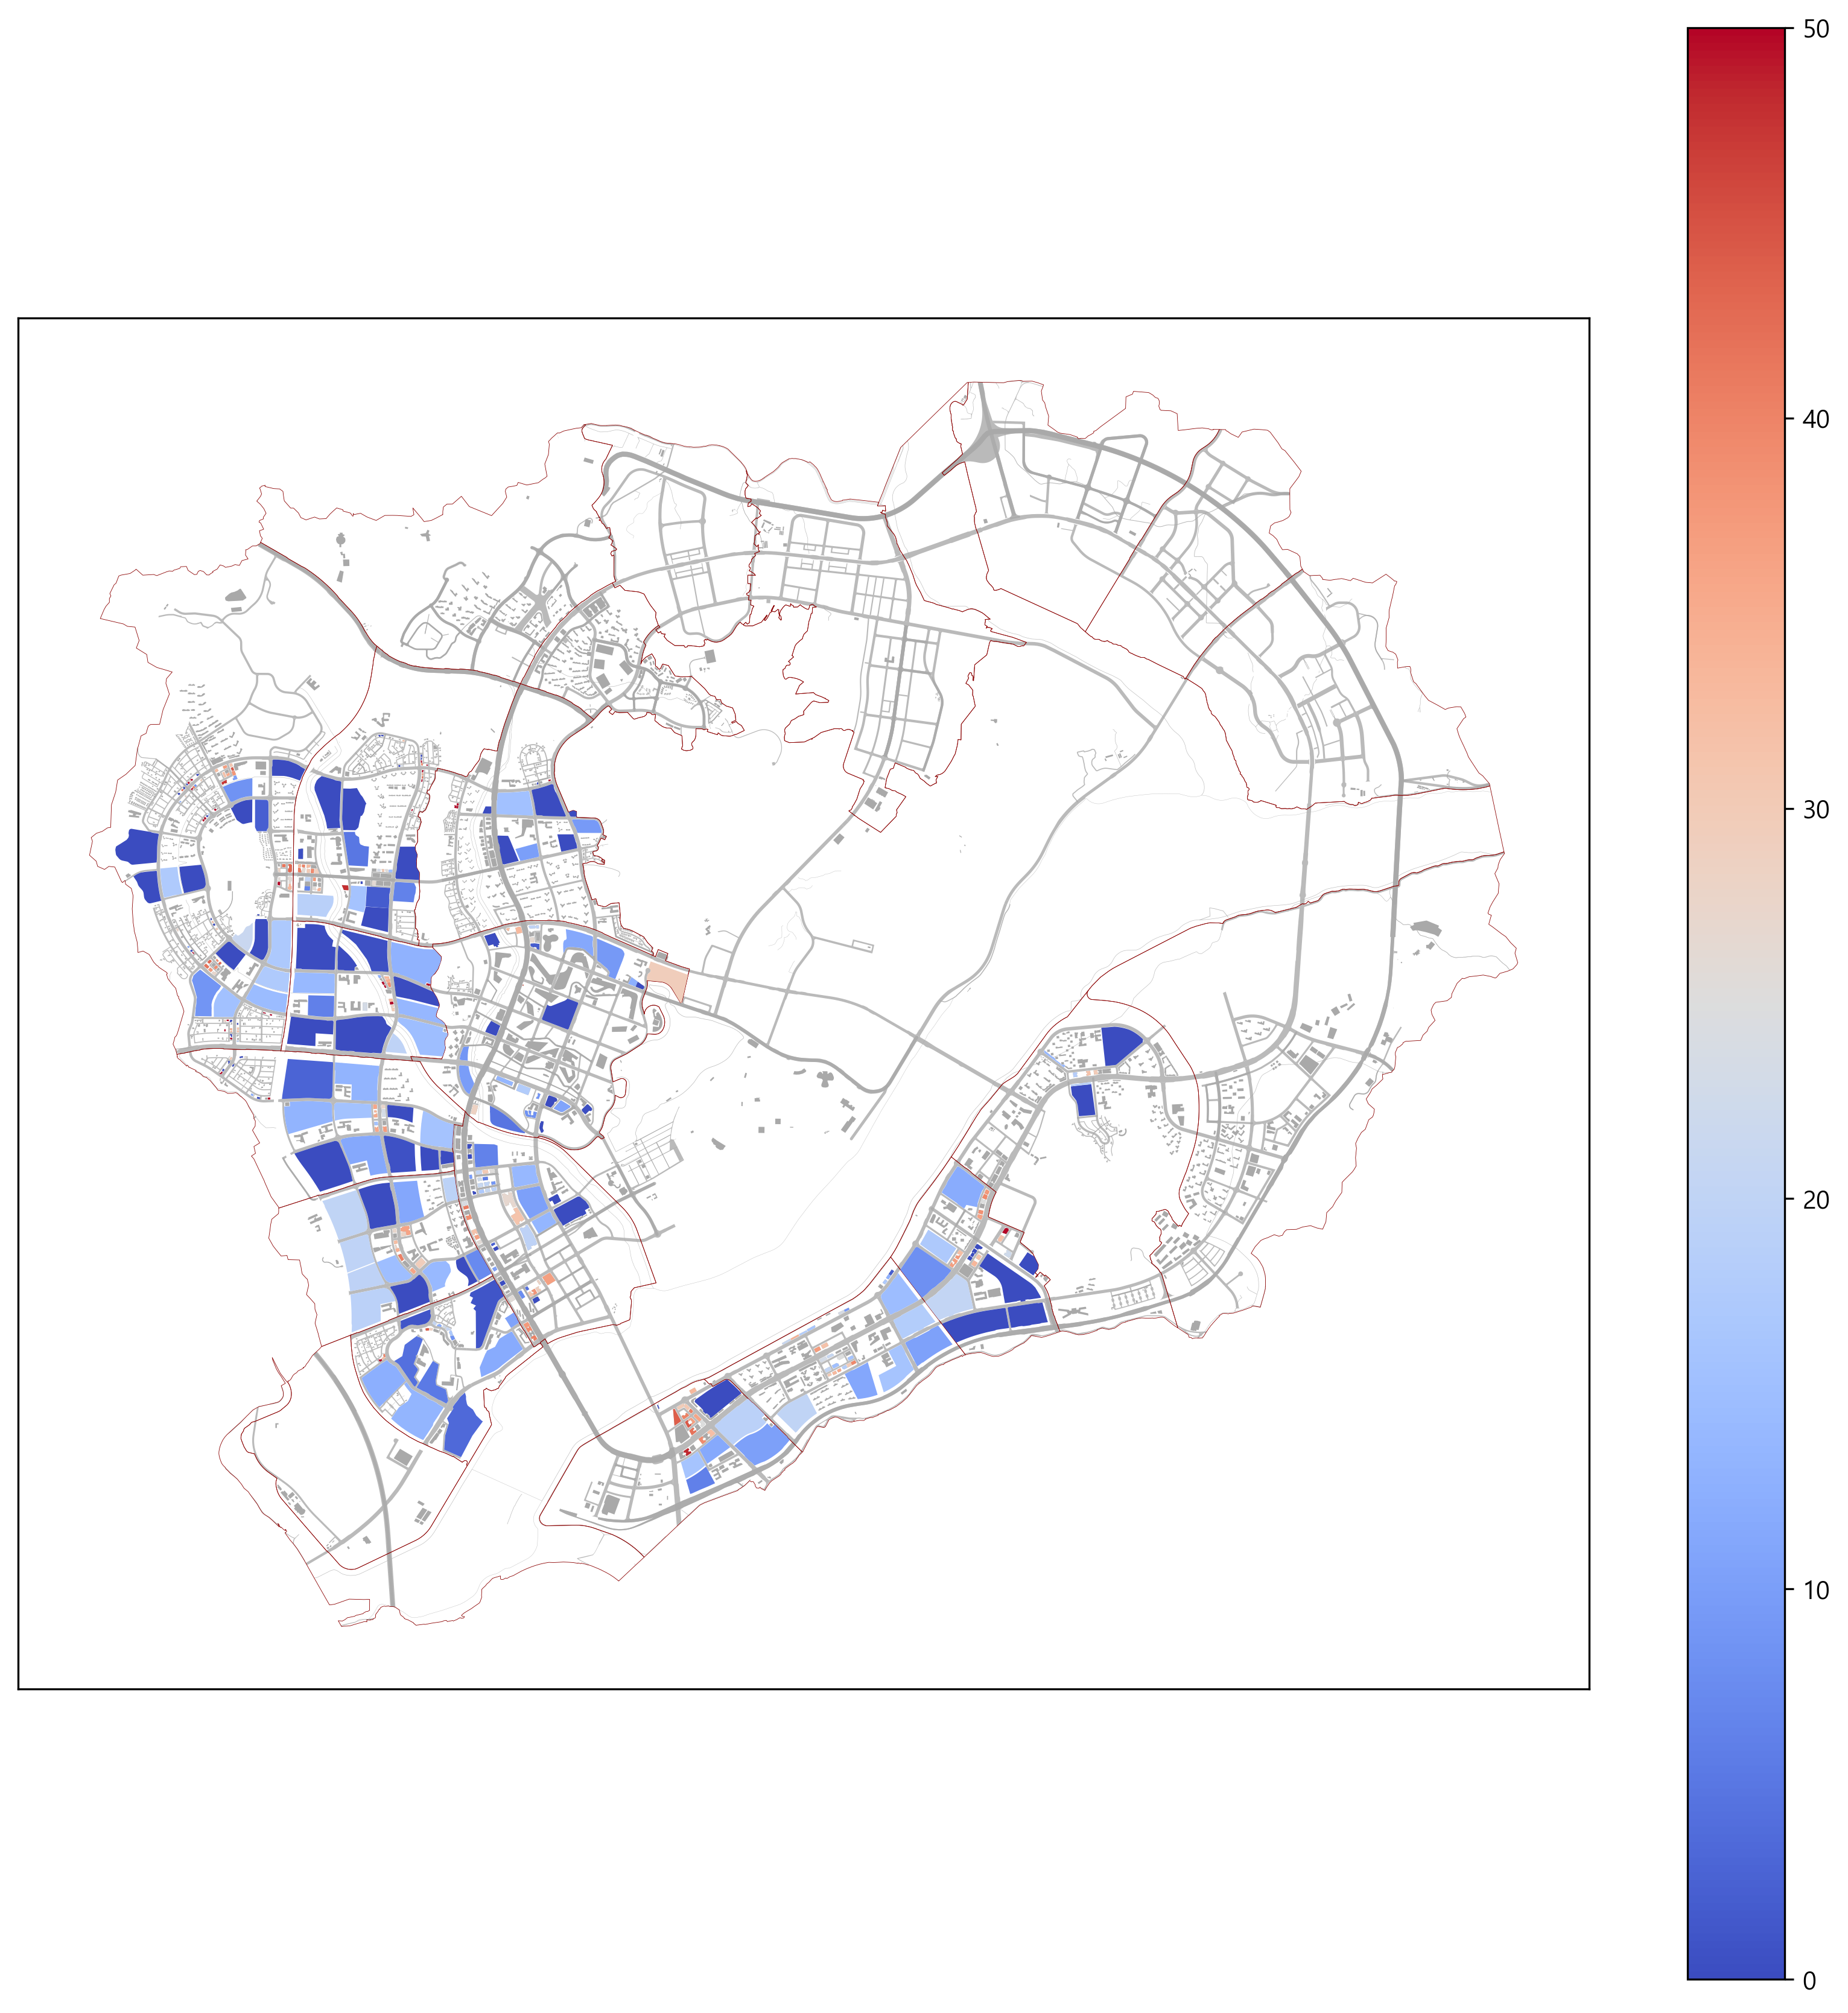

In [ ]:
# plot vacancy_2405
fig, ax = plt.subplots(figsize=(14, 14), dpi = 300)

# 도로 데이터
# rw_poly_clipped.plot(ax=ax, facecolor='darkgray',alpha=0.8, zorder=1)
# 건물 데이터
building_clipped.plot(ax=ax, facecolor='darkgrey', zorder=2)
# 세종시 경계(기존 읍면동 단위)
sejong_zone_adm_boundary.plot(ax=ax, facecolor='none', edgecolor='DarkRed', linewidth=0.2, zorder=3)

# 최대 최소값 설정
vmin = 0
vmax = 50
# 공실률 데이터
vacancy2405.plot(ax=ax, column='vacancy_rat', cmap='coolwarm', vmin = vmin, vmax= vmax, legend=True, zorder=4)

# 그리드 끄기 (두 방법 모두 시도)
ax.grid(False)  # 일반적인 방법
ax.set_axisbelow(True)  # 그리드를 데이터 뒤로 보내기
ax.xaxis.set_visible(False)  # x축 눈금 끄기
ax.yaxis.set_visible(False)  # y축 눈금 끄기
plt.show()


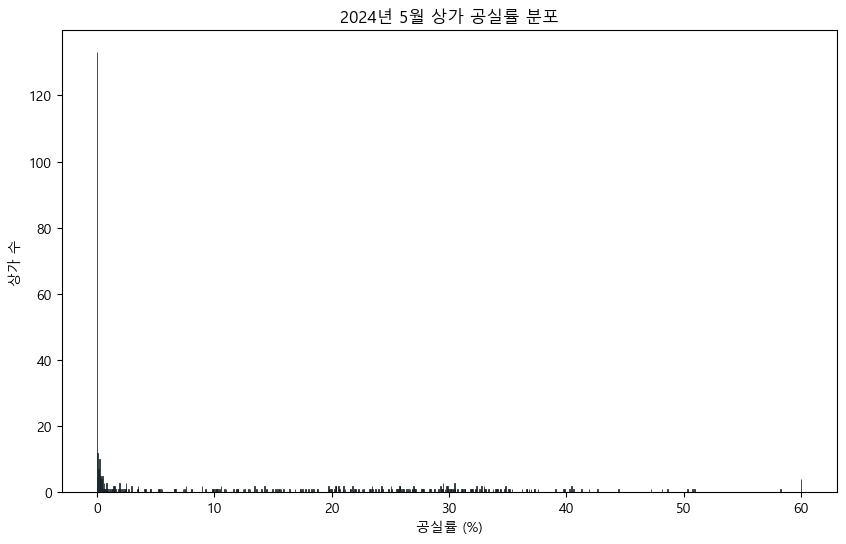

In [ ]:
# vacancy rat을 히스토그램으로 찍어보기 
plt.figure(figsize=(5, 3))
plt.hist(vacancy_2405['vacancy_rat'], bins=1000, color='skyblue', edgecolor='black', linewidth=0.5)
plt.title('2024년 5월 상가 공실률 분포')
plt.xlabel('공실률 (%)')
# plt.xlim(-30,60)
plt.ylabel('상가 수')
plt.show()

# 7. 파일로 내보내기

In [ ]:
master_sanga_bld.drop('geometry_y', axis=1, inplace = True)
master_sanga_bld = master_sanga_bld.rename(columns={'geometry_x':'geometry'})
master_sanga_bld = gpd.GeoDataFrame(master_sanga_bld, geometry='geometry')

In [ ]:
# master_sanga_bld.to_file('00data/102.상가_공실률.geojson')